# Regression

## Import

In [117]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score

## Read and re-format

In [119]:
#RELOAD FILE AND PRETEND THAT IS OUR STARTING POINT 
df=pd.read_csv('../eda/ev-wiki-crawl-results.csv')  
print(df.shape)

#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #y1=[]; y2=[]
y1=[]
for label in df["label"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)

# CONVERT DF TO LIST OF STRINGS 
corpus=df["text"].to_list()
y2=df["sentiment"].to_numpy()

print("number of text chunks = ",len(corpus))
print(corpus[0:3])

(1225, 3)
index = 0 : label = electric vehicle
index = 1 : label = gasoline vehicle
index = 2 : label = hybrid vehicle
number of text chunks =  1225
['electric motive power started 1827 hungarian priest nyos jedlik built first crude viable electric motor used stator rotor commutator next year used power small car 1835 professor sibrandus stratingh university groningen netherlands built small scale electric car sometime 1832 1839 robert anderson scotland invented first crude electric carriage powered non rechargeable primary cell american blacksmith inventor thomas davenport built toy electric locomotive powered primitive electric motor 1835 1838 scotsman named robert davidson built electric locomotive attained speed four mile per hour km england patent granted 1840 use rail conductor electric current similar american patent issued lilley colten 1847', 'first mass produced appeared america early 1900s 1902 studebaker automobile company entered automotive business though also entered gas

## Vectorize the text data

In [120]:
# INITIALIZE COUNT VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
vectorizer=CountVectorizer(min_df=0.0001)   

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

#CONVERT TO ONE-HOT VECTORS
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

# DOUBLE CHECK 
print(X.shape,y1.shape,y2.shape)
print("DATA POINT-0:",X[0,0:10],"y1 =",y1[0],"  y2 =",y2[0])

(1225, 8233) (1225,) (1225,)
DATA POINT-0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] y1 = 0   y2 = -0.7506


## Partition Data
**Assignment 3.2.4: Break data into an 80-20 training/test set**

In [121]:
#INSERT CODE TO PARTITION DATASET INTO TRAINING-TEST

from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape		:",x_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",x_test.shape)
print("y_test.shape		:",y_test.shape)

x_train.shape		: (980, 8233)
y_train.shape		: (980,)
X_test.shape		: (245, 8233)
y_test.shape		: (245,)


## Utility function
- Write a function to report accuracy
- Note this will act on object stored in pythons global scope. Therefore as long as everything is named the same you can recycle it for multiple models

In [122]:
def report(y,ypred):
      #ACCURACY COMPUTE 
      print("Accuracy:",accuracy_score(y, ypred)*100)
      print("Number of mislabeled points out of a total %d points = %d"
            % (y.shape[0], (y != ypred).sum()))

def print_model_summary():
      # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
      yp_train = model.predict(x_train)
      yp_test = model.predict(x_test)

      print("ACCURACY CALCULATION\n")

      print("TRAINING SET:")
      report(y_train,yp_train)

      print("\nTEST SET (UNTRAINED DATA):")
      report(y_test,yp_test)

      print("\nCHECK FIRST 20 PREDICTIONS")
      print("TRAINING SET:")
      print(y_train[0:20])
      print(yp_train[0:20])
      print("ERRORS:",yp_train[0:20]-y_train[0:20])

      print("\nTEST SET (UNTRAINED DATA):")
      print(y_test[0:20])
      print(yp_test[0:20])
      print("ERRORS:",yp_test[0:20]-y_test[0:20])

## Regression model: KNN

- fit y2 (sentiment score from -1 to 1) instead of y1 (classes)

## Hyper-Parameter tuning

In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

# HYPER PARAMETER SEARCH FOR OPTIMAL NUMBER OF NEIGHBORS 
num_neighbors_2=[]
train_error=[]
test_error=[]

# LOOP OVER HYPER-PARAM
for i in range(1,33):
    # INITIALIZE MODEL 
    model = KNeighborsRegressor(n_neighbors=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    print("n_neighbors =",i)
    # shift=1+np.min(y_train) #add shift to remove division by zero 
    err1=mean_absolute_error(y_train, yp_train) 
    err2=mean_absolute_error(y_test, yp_test) 

    num_neighbors_2.append(i)
    train_error.append(err1)
    test_error.append(err2)

    print(" train MAE:",err1)
    print(" test MAE:" ,err2)

n_neighbors = 1
 train MAE: 0.3040816326530612
 test MAE: 0.926530612244898
n_neighbors = 2
 train MAE: 0.4627551020408163
 test MAE: 0.8428571428571429
n_neighbors = 3
 train MAE: 0.5479591836734694
 test MAE: 0.7945578231292517
n_neighbors = 4
 train MAE: 0.5816326530612245
 test MAE: 0.7520408163265306
n_neighbors = 5
 train MAE: 0.5932653061224491
 test MAE: 0.7240816326530614
n_neighbors = 6
 train MAE: 0.585374149659864
 test MAE: 0.6965986394557823
n_neighbors = 7
 train MAE: 0.5906705539358601
 test MAE: 0.6857142857142857
n_neighbors = 8
 train MAE: 0.5923469387755103
 test MAE: 0.6586734693877551
n_neighbors = 9
 train MAE: 0.591156462585034
 test MAE: 0.6476190476190476
n_neighbors = 10
 train MAE: 0.5948979591836735
 test MAE: 0.6412244897959185
n_neighbors = 11
 train MAE: 0.5950834879406307
 test MAE: 0.6430426716141002
n_neighbors = 12
 train MAE: 0.5951530612244897
 test MAE: 0.6414965986394559
n_neighbors = 13
 train MAE: 0.5978021978021978
 test MAE: 0.641758241758241

## Convergence plot

Text(0, 0.5, 'Training (black) and test (blue) MAE (error)')

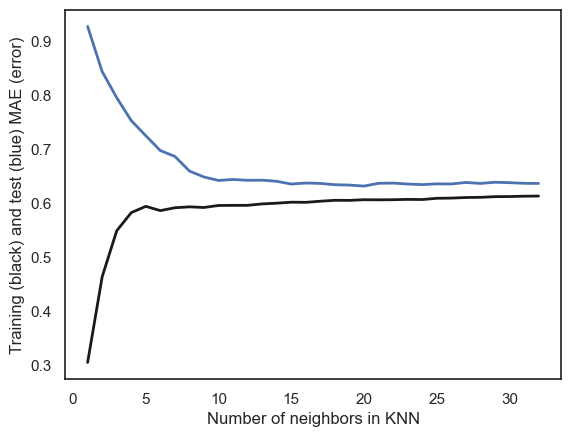

In [124]:
plt.plot(num_neighbors_2,train_error ,linewidth=2, color='k')
plt.plot(num_neighbors_2,test_error ,linewidth=2, color='b')

plt.xlabel("Number of neighbors in KNN")
plt.ylabel("Training (black) and test (blue) MAE (error)")

## Re-train with optimal parameters

In [125]:
# INITIALIZE MODEL 
model = KNeighborsRegressor(n_neighbors=35)

# TRAIN MODEL 
model.fit(x_train,y_train)

# OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

## Parity Plot
- Plotting y_pred vs y_data lets you see how good the fit is

- The closer to the line y=x the better the fit (ypred=ydata --> prefect fit)

Text(0, 0.5, 'y_pred (blue=test)(black=Train)')

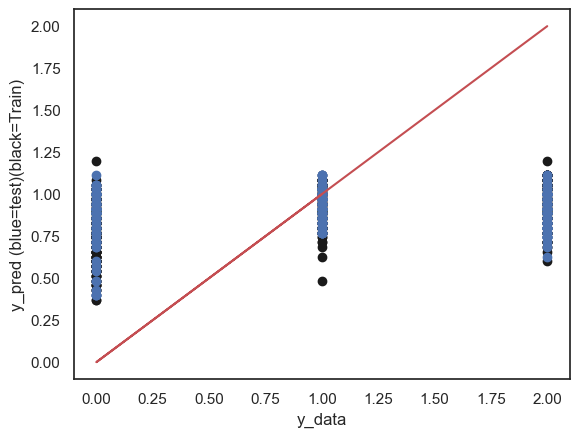

In [126]:
plt.plot(y_train,yp_train ,"o", color='k')
plt.plot(y_test,yp_test ,"o", color='b')
plt.plot(y_test,y_test ,"-", color='r')

plt.xlabel("y_data")
plt.ylabel("y_pred (blue=test)(black=Train)")

Plot tree

In [127]:
from sklearn import tree
def plot_tree(model):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                    filled=True)
    plt.show()

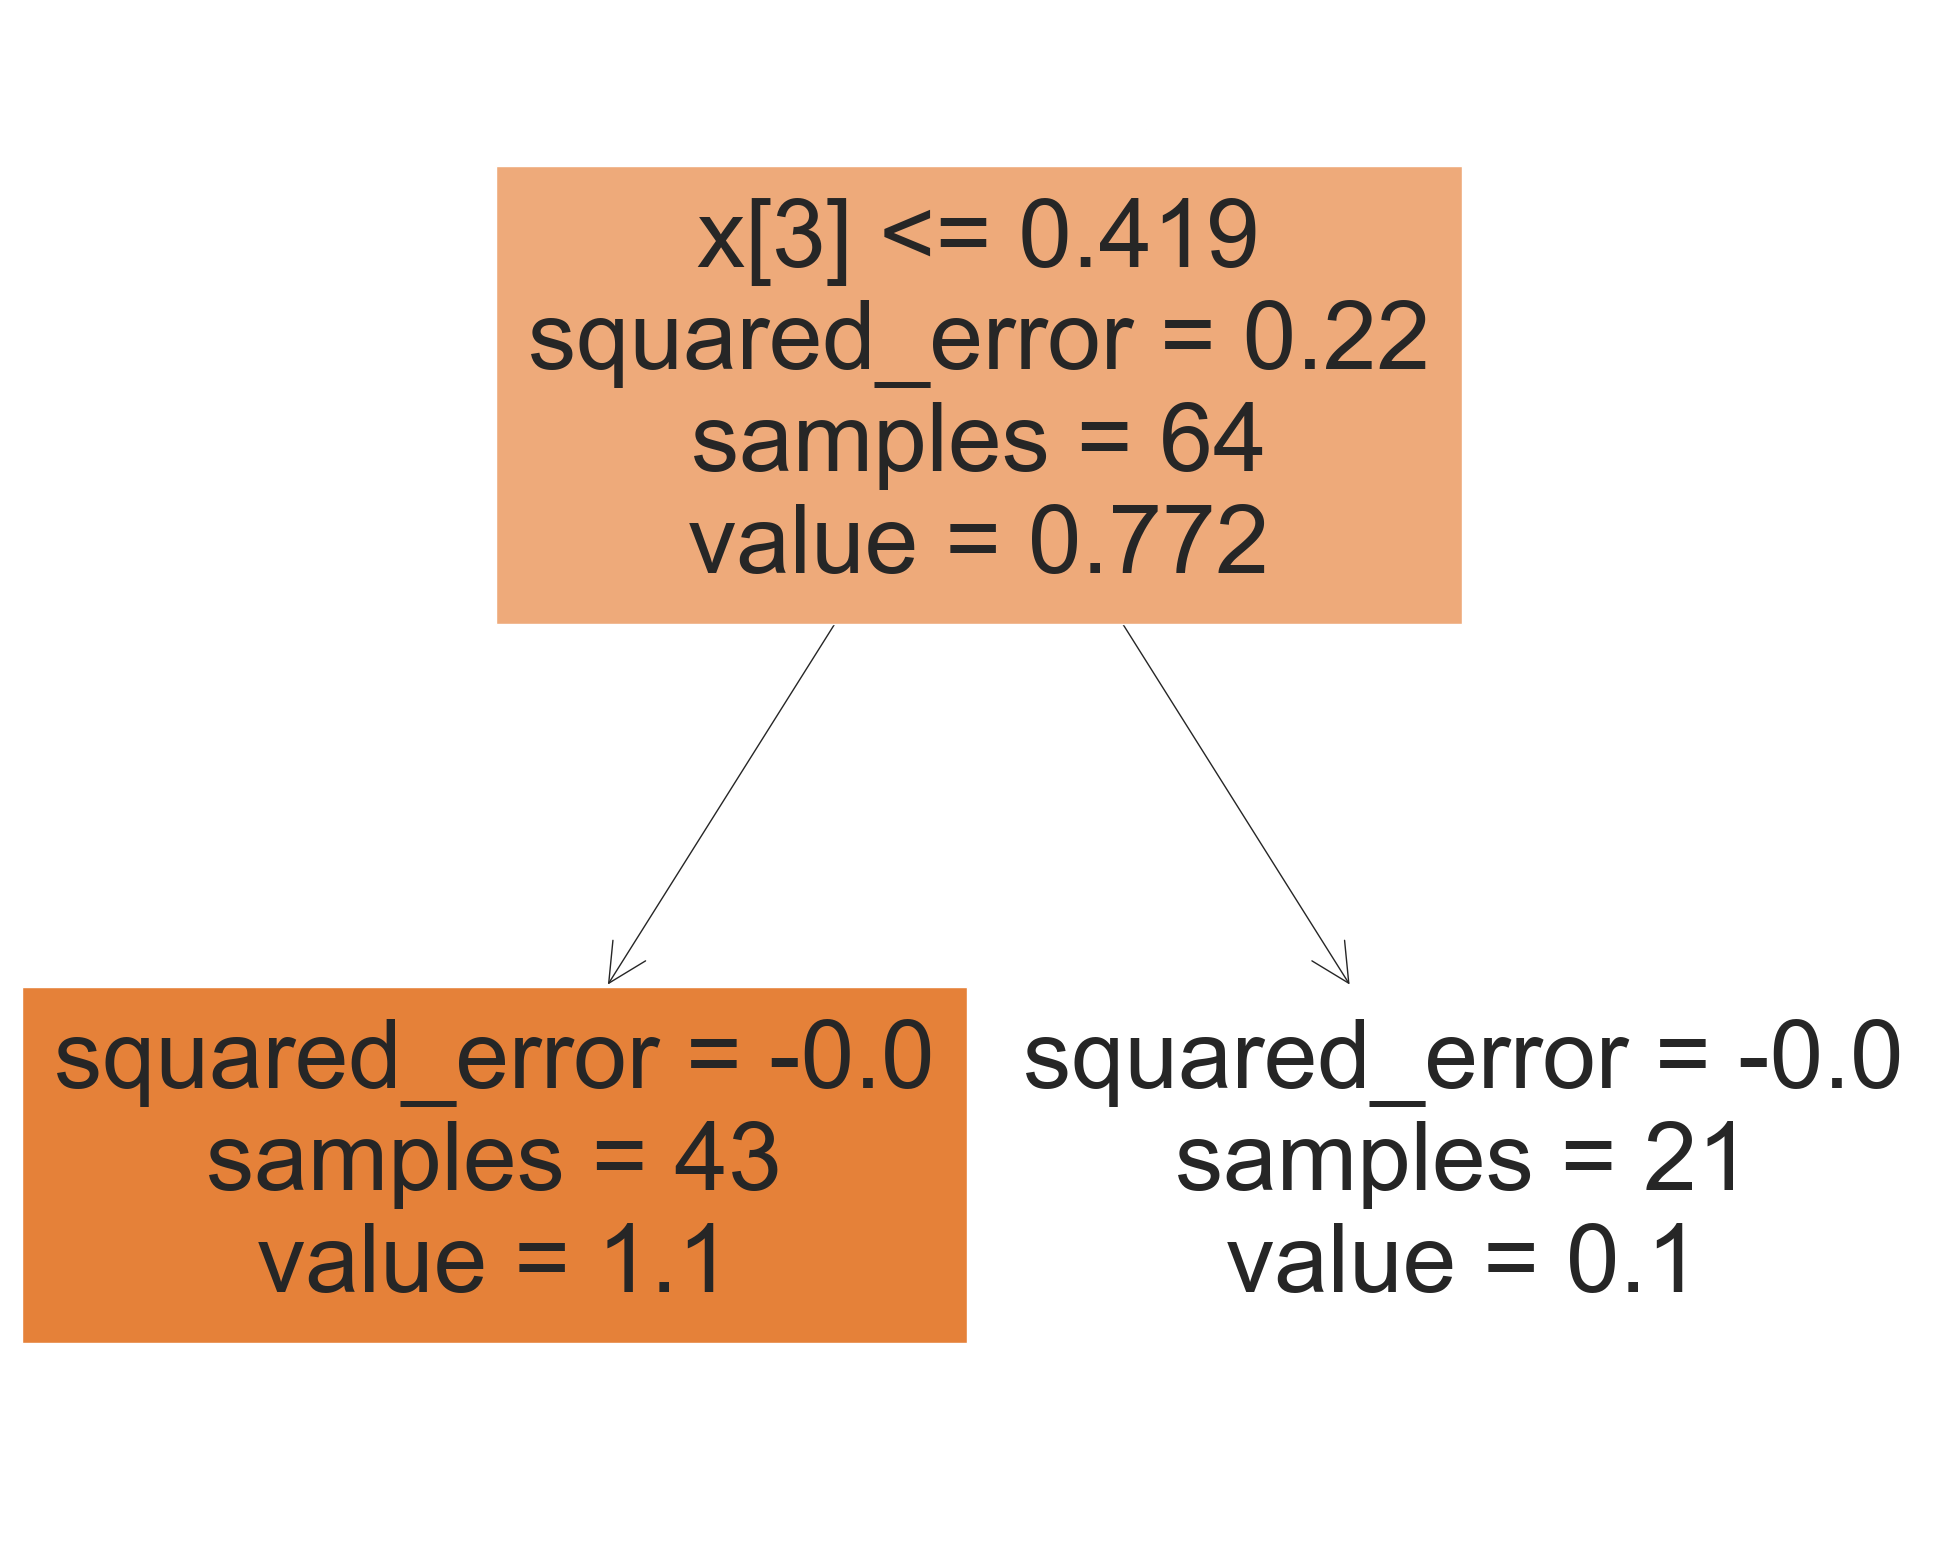

In [ ]:
plot_tree(model)

0


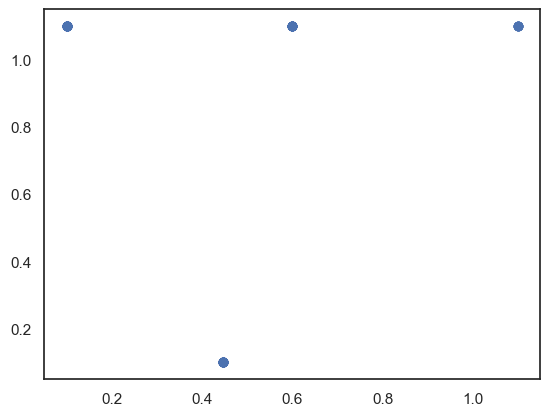

1


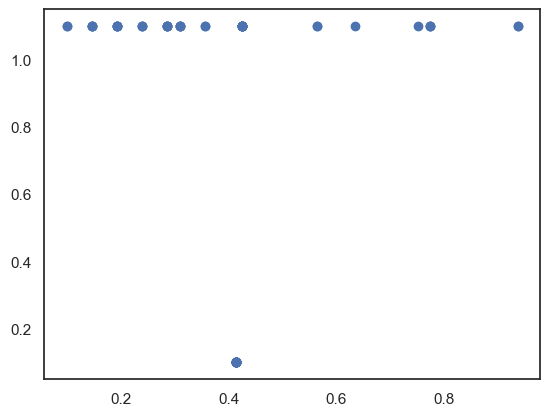

2


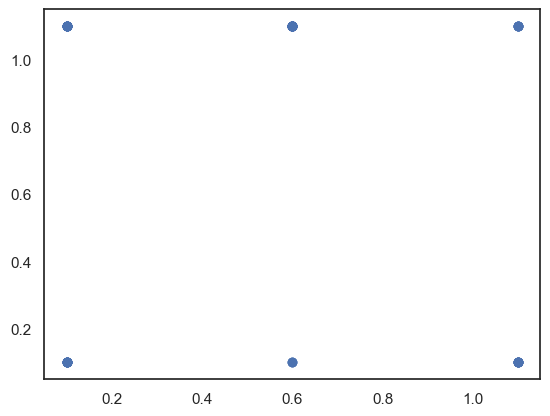

3


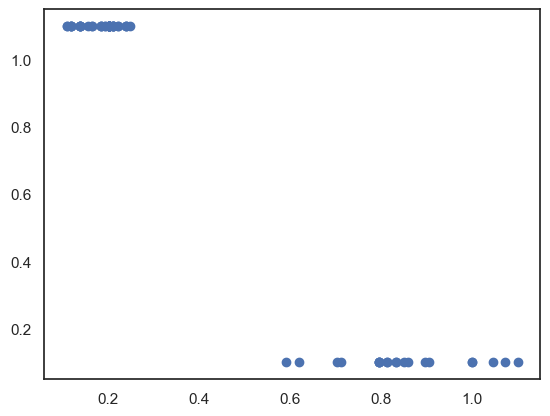

4


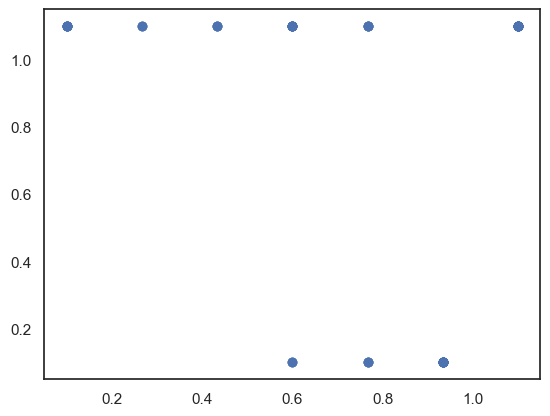

5


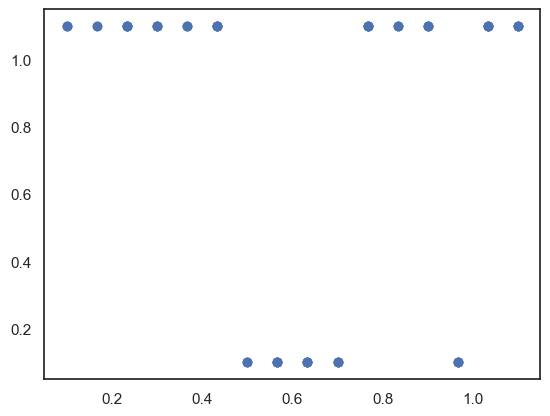

6


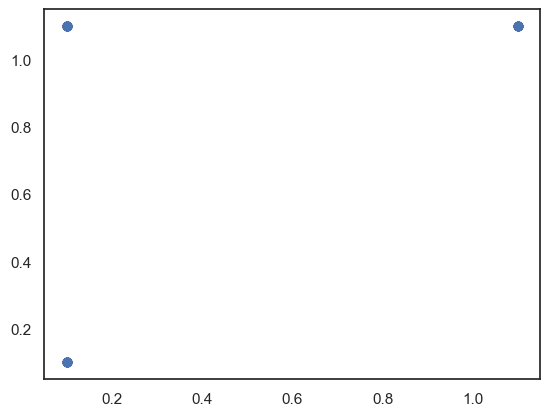

7


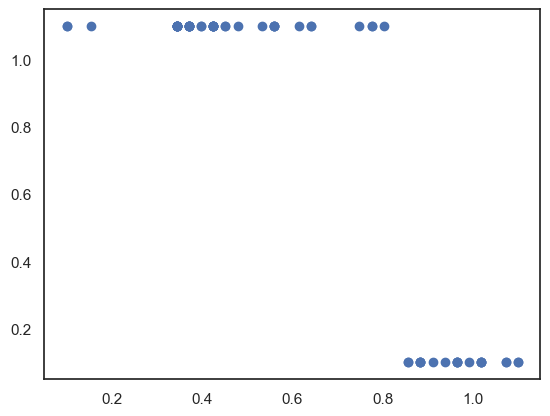

In [ ]:
#loop over columns
for i in range(0, x_train.shape[1]):
    print(i)
    plt.plot(x_train.iloc[:, i], y_train, "o", color='b')
    plt.show()

 train error: 45.71642474234835
 test error: 27.859375656835915


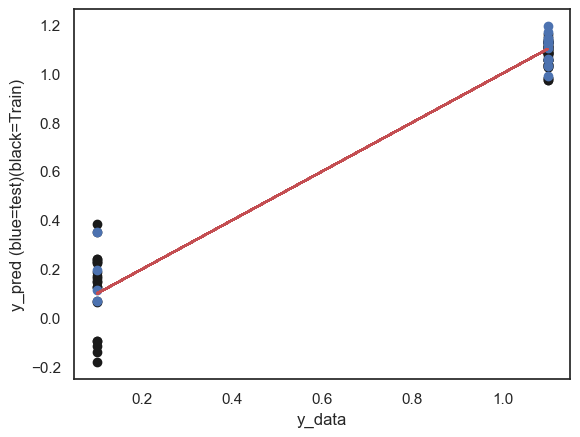

In [ ]:
# LINEAR REGRESSION 
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

# OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

plt.plot(y_train,yp_train ,"o", color='k')
plt.plot(y_test,yp_test ,"o", color='b')
plt.plot(y_train,y_train,"-", color='r')

plt.xlabel("y_data")
plt.ylabel("y_pred (blue=test)(black=Train)")

    
err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

print(" train error:",err1)
print(" test error:" ,err2)

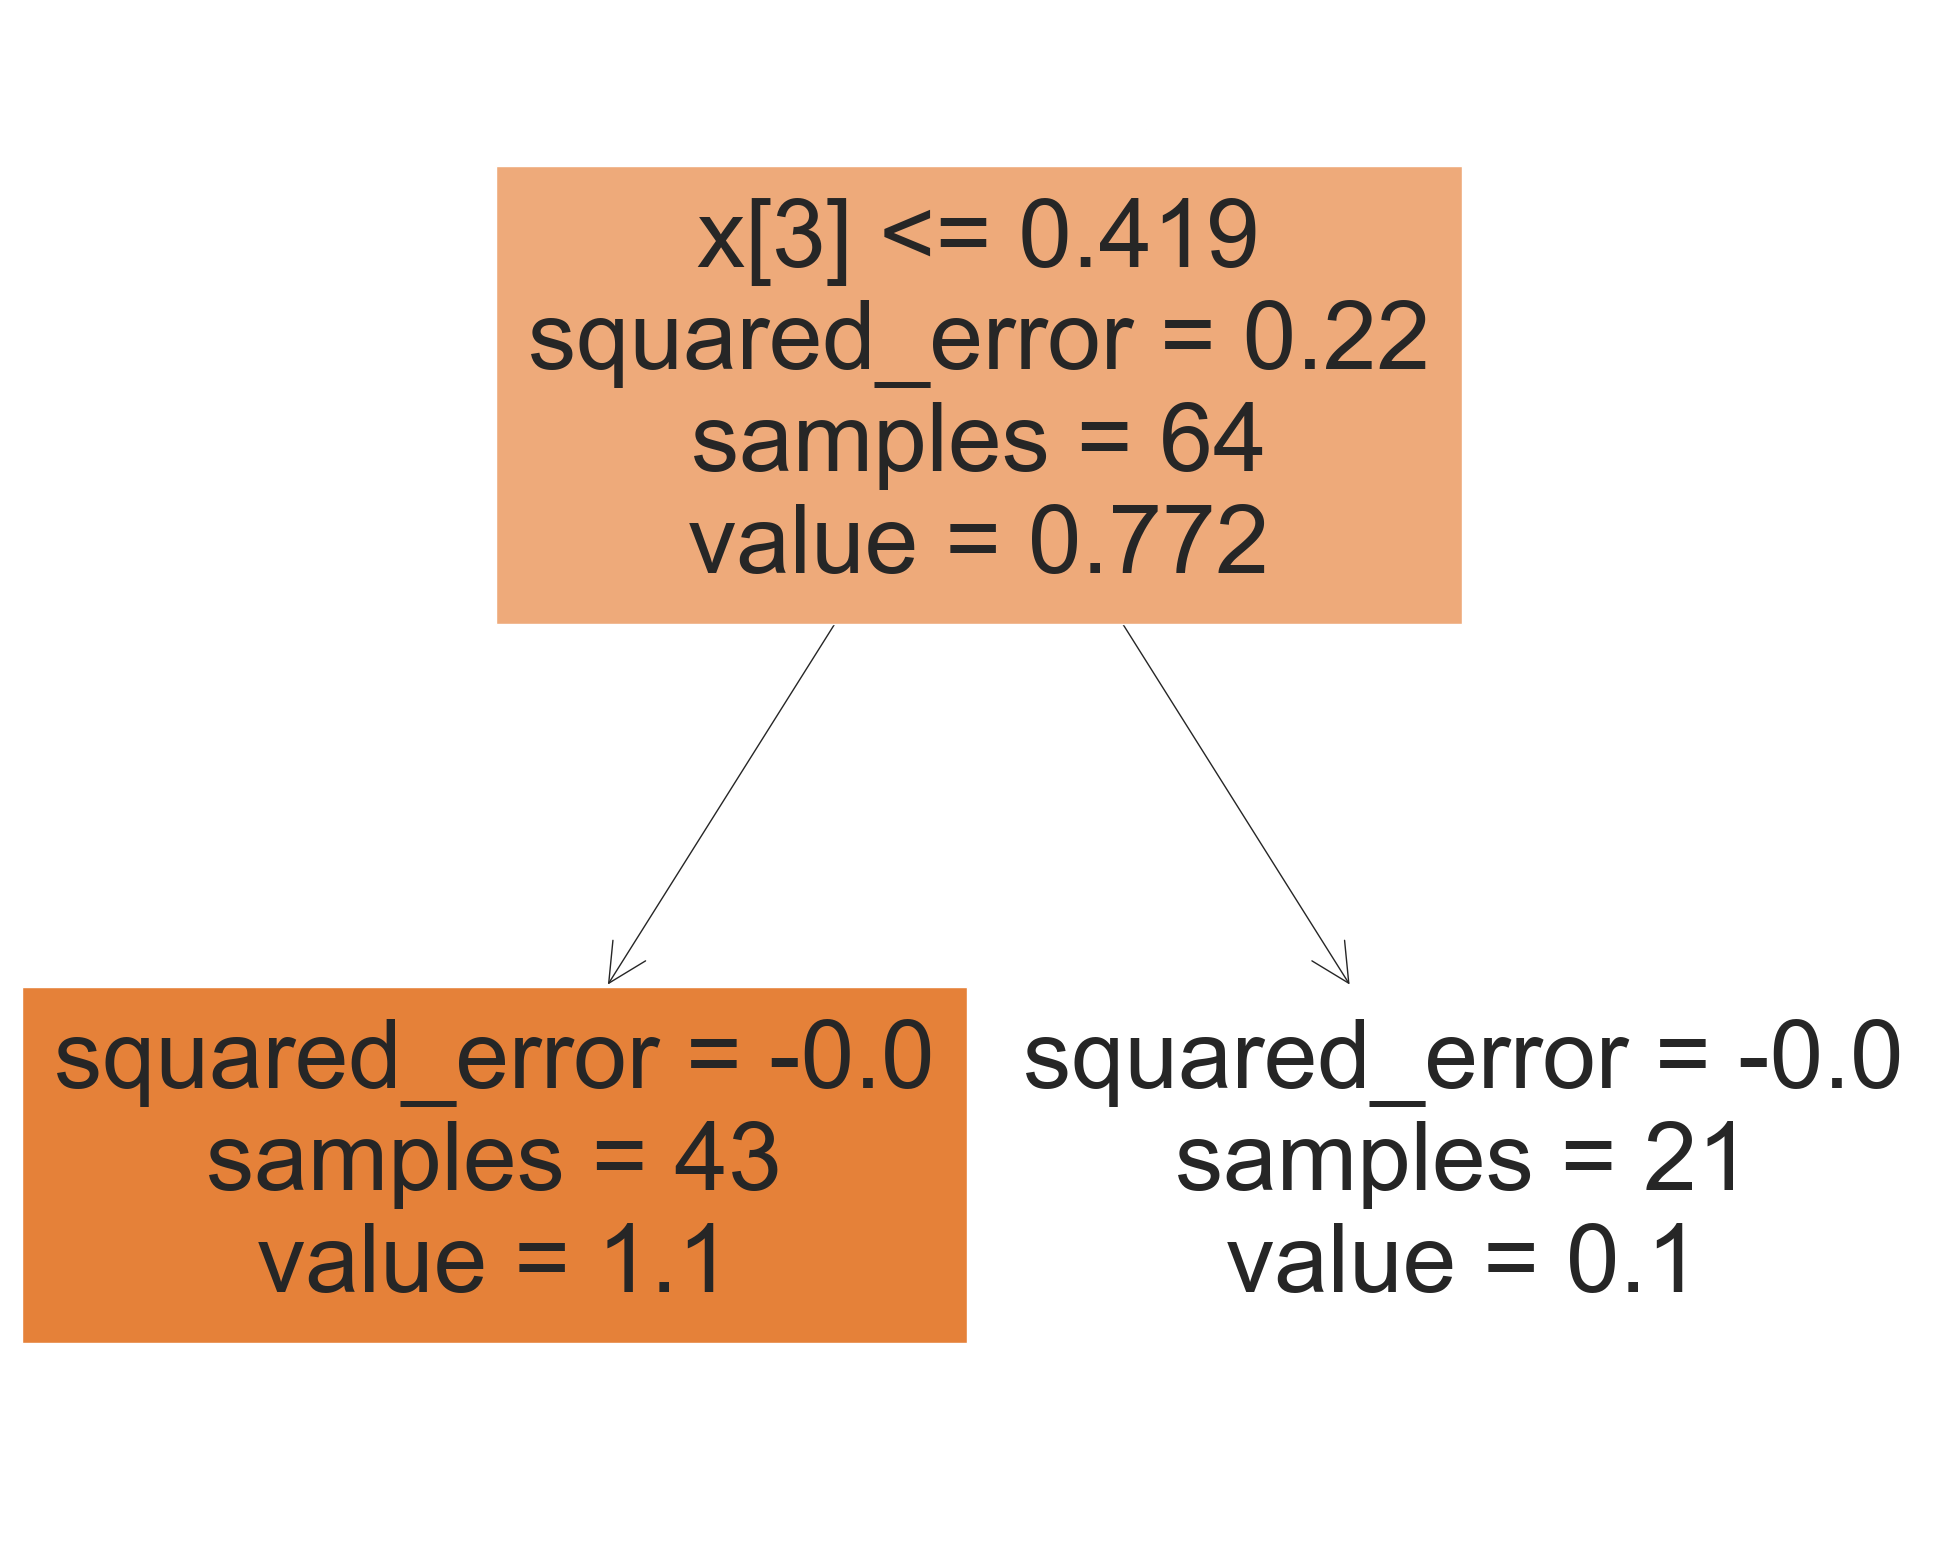

In [ ]:
model = DecisionTreeRegressor(min_samples_split=50)
model.fit(x_train,y_train)
plot_tree(model)

 train error: 40.00431316772487
 test error: 27.20196900065661


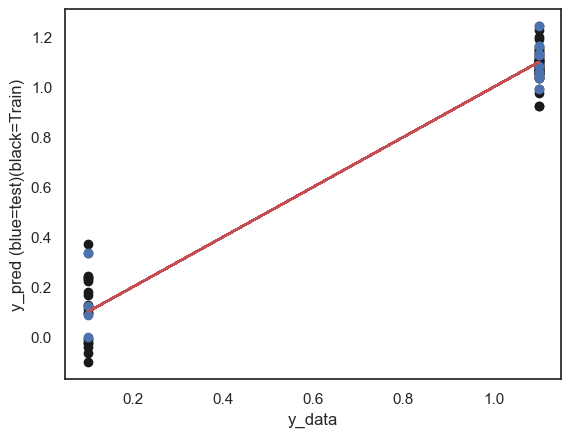

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(32,32,32),random_state=1, max_iter=10000).fit(x_train, y_train)

# OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

plt.plot(y_train,yp_train ,"o", color='k')
plt.plot(y_test,yp_test ,"o", color='b')
plt.plot(y_train,y_train,"-", color='r')

plt.xlabel("y_data")
plt.ylabel("y_pred (blue=test)(black=Train)")

    
err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

print(" train error:",err1)
print(" test error:" ,err2)
